In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('properties_missing_value_imputation.csv')

In [5]:
df.shape

(3554, 18)

In [6]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sohna road road,6.25,6944.0,3.0,3.0,0,1.0,Moderately Old,9000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,flat,indiabulls centrum park,sector 103,1.15,8679.0,2.0,2.0,3,10.0,Relatively New,1080.0,1.0,0.0,0.0,0.0,0.0,2.0,174.0
2,flat,emaar gurgaon greens,sector 102,1.45,8788.0,3.0,3.0,3,8.0,Relatively New,1300.0,0.0,1.0,0.0,0.0,0.0,0.0,49.0
3,flat,ss the leaf,sector 85,1.05,6162.0,2.0,2.0,3+,7.0,Relatively New,1512.0,0.0,0.0,1.0,0.0,0.0,0.0,144.0
4,house,vatika india next,sector 83,1.70,7870.0,3.0,3.0,3+,4.0,New Property,2160.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [7]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [8]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,sohna road road,6.25,3.0,3.0,0,1.0,Moderately Old,9000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,flat,sector 103,1.15,2.0,2.0,3,10.0,Relatively New,1080.0,1.0,0.0,0.0,0.0,0.0,2.0,174.0
2,flat,sector 102,1.45,3.0,3.0,3,8.0,Relatively New,1300.0,0.0,1.0,0.0,0.0,0.0,0.0,49.0
3,flat,sector 85,1.05,2.0,2.0,3+,7.0,Relatively New,1512.0,0.0,0.0,1.0,0.0,0.0,0.0,144.0
4,house,sector 83,1.70,3.0,3.0,3+,4.0,New Property,2160.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


## luxury score

<Axes: >

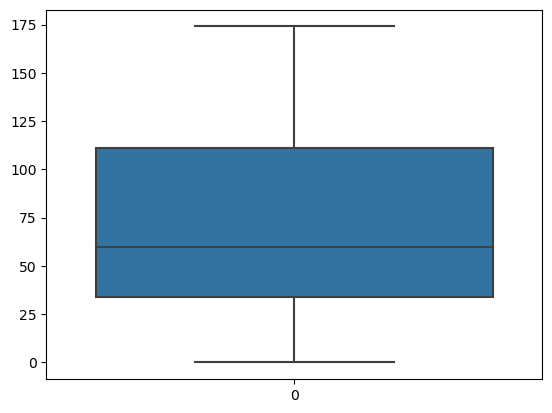

In [9]:
sns.boxplot(df['luxury_score'])

In [10]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [11]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [12]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,house,sohna road road,6.25,3.0,3.0,0,1.0,Moderately Old,9000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
1,flat,sector 103,1.15,2.0,2.0,3,10.0,Relatively New,1080.0,1.0,0.0,0.0,0.0,0.0,2.0,174.0,High
2,flat,sector 102,1.45,3.0,3.0,3,8.0,Relatively New,1300.0,0.0,1.0,0.0,0.0,0.0,0.0,49.0,Low
3,flat,sector 85,1.05,2.0,2.0,3+,7.0,Relatively New,1512.0,0.0,0.0,1.0,0.0,0.0,0.0,144.0,Medium
4,house,sector 83,1.70,3.0,3.0,3+,4.0,New Property,2160.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Low


## floorNum

<Axes: >

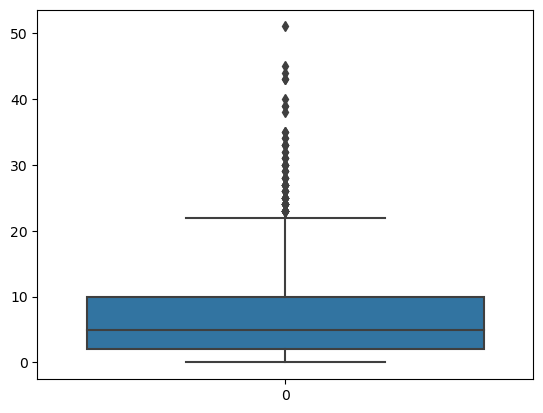

In [13]:
sns.boxplot(df['floorNum'])

In [14]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [15]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [16]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,house,sohna road road,6.25,3.0,3.0,0,1.0,Moderately Old,9000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low Floor
1,flat,sector 103,1.15,2.0,2.0,3,10.0,Relatively New,1080.0,1.0,0.0,0.0,0.0,0.0,2.0,174.0,High,Mid Floor
2,flat,sector 102,1.45,3.0,3.0,3,8.0,Relatively New,1300.0,0.0,1.0,0.0,0.0,0.0,0.0,49.0,Low,Mid Floor
3,flat,sector 85,1.05,2.0,2.0,3+,7.0,Relatively New,1512.0,0.0,0.0,1.0,0.0,0.0,0.0,144.0,Medium,Mid Floor
4,house,sector 83,1.70,3.0,3.0,3+,4.0,New Property,2160.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Low,Mid Floor


In [17]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [18]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,house,sohna road road,6.25,3.0,3.0,0,Moderately Old,9000.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low Floor
1,flat,sector 103,1.15,2.0,2.0,3,Relatively New,1080.0,1.0,0.0,0.0,0.0,0.0,2.0,High,Mid Floor
2,flat,sector 102,1.45,3.0,3.0,3,Relatively New,1300.0,0.0,1.0,0.0,0.0,0.0,0.0,Low,Mid Floor
3,flat,sector 85,1.05,2.0,2.0,3+,Relatively New,1512.0,0.0,0.0,1.0,0.0,0.0,0.0,Medium,Mid Floor
4,house,sector 83,1.70,3.0,3.0,3+,New Property,2160.0,0.0,1.0,0.0,1.0,0.0,0.0,Low,Mid Floor


In [19]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)


[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17a', 'sector 17b', 'sector 2',
       'sector 21', 'sector 22', 'sector 23', 'sector 24', 'sector 25',
       'sector 26', 'sector 27', 'sector 28', 'sector 3',
       'sector 3 phase 2', 'sector 3 phase 3 extension', 'sector 30',
       'sector 31', 'sector 33', 'sector 36', 'sector 36a', 'sector 37',
       'sector 37c', 'sector 37d', 'sector 38', 'sector 39', 'sector 4',
       'sector 40', 'sector 41', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 'sector 5

In [20]:
# Splitting the dataset into dependent and independent variables
X = data_label_encoded.drop('price', axis=1)
y = data_label_encoded['price']

In [21]:
X

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,1.0,112.0,3.0,3.0,0.0,0.0,9000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,5.0,2.0,2.0,3.0,3.0,1080.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0
2,0.0,4.0,3.0,3.0,3.0,3.0,1300.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
3,0.0,97.0,2.0,2.0,4.0,3.0,1512.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0
4,1.0,95.0,3.0,3.0,4.0,1.0,2160.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,6.0,3.0,4.0,4.0,0.0,2217.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0
3550,0.0,42.0,2.0,2.0,2.0,3.0,1086.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
3551,0.0,5.0,2.0,3.0,3.0,3.0,1257.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0
3552,1.0,50.0,4.0,4.0,4.0,0.0,540.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0


In [22]:
y

0       6.25
1       1.15
2       1.45
3       1.05
4       1.70
        ... 
3549    2.30
3550    0.67
3551    0.89
3552    1.65
3553    1.35
Name: price, Length: 3554, dtype: float64

# Calculating Feature Importance using Differnet Techniques

## 1. Correlation Analysis

<Axes: >

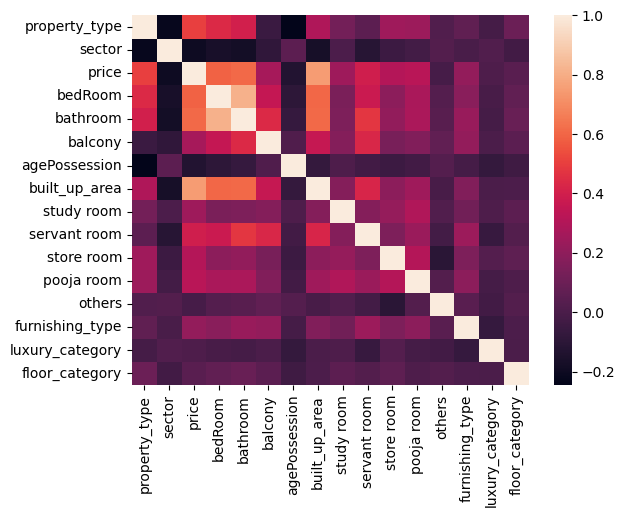

In [23]:
 sns.heatmap(data_label_encoded.corr())

In [24]:
data_label_encoded.corr()['price']

property_type      0.503728
sector            -0.201678
price              1.000000
bedRoom            0.591289
bathroom           0.609777
balcony            0.269637
agePossession     -0.129866
built_up_area      0.748574
study room         0.242955
servant room       0.391930
store room         0.305677
pooja room         0.319852
others            -0.013064
furnishing_type    0.214723
luxury_category    0.009788
floor_category     0.042745
Name: price, dtype: float64

In [25]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.201678
1,price,1.000000
2,bedRoom,0.591289
3,bathroom,0.609777
4,balcony,0.269637
5,agePossession,-0.129866
6,built_up_area,0.748574
7,study room,0.242955
8,servant room,0.391930
9,store room,0.305677


## 2 - Random Forest Feature Importance

In [26]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X, y)

RandomForestRegressor(random_state=0)

In [27]:
# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X.columns,
    'rf_importance': rf.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.651692
1,sector,0.105381
0,property_type,0.102211
2,bedRoom,0.024942
3,bathroom,0.024231
8,servant room,0.019889
5,agePossession,0.014379
4,balcony,0.012766
7,study room,0.008427
13,luxury_category,0.007375


## 3 - Gradient Boosting Feature importances

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Gradient Boosting regressor on label encoded data
gb = GradientBoostingRegressor()
gb.fit(X, y)

GradientBoostingRegressor()

In [29]:
# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X.columns,
    'gb_importance': gb.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.683934
1,sector,0.102146
0,property_type,0.096270
2,bedRoom,0.038196
3,bathroom,0.035531
8,servant room,0.021478
9,store room,0.009534
5,agePossession,0.004389
7,study room,0.004055
4,balcony,0.001708


## 4 - Permutation Importance

In [30]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
# Train a Random Forest regressor on label encoded data
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [33]:
# Calculate Permutation Importance
perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=30, random_state=0)

In [34]:
# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.728299
0,property_type,0.156492
1,sector,0.134580
5,agePossession,0.008164
8,servant room,0.006302
14,floor_category,0.003055
9,store room,0.001915
12,furnishing_type,0.000744
11,others,-0.000700
13,luxury_category,-0.000805


##  5 - LASSO

In [35]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [36]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=0)
lasso.fit(X_scaled, y)

Lasso(alpha=0.01, random_state=0)

In [38]:
# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.510896
0,property_type,0.706814
3,bathroom,0.280610
9,store room,0.199175
7,study room,0.176152
8,servant room,0.165851
12,furnishing_type,0.137815
10,pooja room,0.075392
13,luxury_category,0.048995
2,bedRoom,0.018164


## 6 - RFE : Recursive Feature Importance

In [39]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

In [40]:
# Apply RFE on the label-encoded and standardized training data
selector = RFE(estimator, n_features_to_select=X.shape[1], step=1)
selector = selector.fit(X, y)

In [41]:
# Get the selected features based on RFE
selected_features = X.columns[selector.support_]

In [42]:
# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector.estimator_.feature_importances_

In [43]:
# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.649547
1,sector,0.103800
0,property_type,0.103390
2,bedRoom,0.026203
3,bathroom,0.023193
8,servant room,0.021081
5,agePossession,0.014627
4,balcony,0.012931
7,study room,0.009032
9,store room,0.007368


## 7 - Linear Regression Weights

In [44]:
from sklearn.linear_model import LinearRegression 

In [45]:
# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y)

LinearRegression()

In [46]:
# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.513293
0,property_type,0.704192
3,bathroom,0.288152
9,store room,0.203620
7,study room,0.184710
8,servant room,0.174759
12,furnishing_type,0.146853
10,pooja room,0.078538
13,luxury_category,0.059575
2,bedRoom,0.020823


## 8 - SHAP

In [47]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X, y)

RandomForestRegressor(random_state=0)

In [48]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)

In [49]:
# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[ 8.33390638e-01, -6.18457007e-01, -4.36123929e-01, ...,
        -1.60242266e-02, -1.24795794e-01,  5.65091793e-02],
       [-1.99601873e-01, -8.06740668e-02, -5.53554678e-02, ...,
         1.07002264e-02,  1.96737362e-02, -1.02562203e-02],
       [-2.46296464e-01, -4.84545314e-02, -2.05264198e-02, ...,
        -8.07617540e-03, -5.09550741e-04, -1.56294401e-02],
       ...,
       [-2.69960929e-01, -2.12633296e-01, -1.28664879e-01, ...,
         8.88315006e-03, -1.90592147e-03, -2.12173237e-02],
       [ 5.42653997e-01,  3.51502291e-01,  1.56050862e-01, ...,
         2.76867841e-02, -9.44711412e-03,  2.24173249e-03],
       [-3.17276100e-01, -1.34451758e-01, -1.74870106e-02, ...,
         1.41255819e-02,  1.71954572e-02, -2.36871021e-02]])

In [50]:
fi_df8 = pd.DataFrame({
    'feature': X.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.249376
0,property_type,0.471192
1,sector,0.385284
3,bathroom,0.122210
8,servant room,0.092413
2,bedRoom,0.054791
4,balcony,0.042044
5,agePossession,0.025156
14,floor_category,0.023885
7,study room,0.020401


In [51]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [52]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.201678,0.105381,0.102146,0.134580,-0.052862,0.103800,-0.061792,0.385284
bedRoom,0.591289,0.024942,0.038196,-0.005888,0.018164,0.026203,0.020823,0.054791
bathroom,0.609777,0.024231,0.035531,-0.000897,0.280610,0.023193,0.288152,0.122210
balcony,0.269637,0.012766,0.001708,-0.001738,-0.045153,0.012931,-0.068270,0.042044
agePossession,-0.129866,0.014379,0.004389,0.008164,-0.023350,0.014627,-0.031021,0.025156
built_up_area,0.748574,0.651692,0.683934,0.728299,1.510896,0.649547,1.513293,1.249376
study room,0.242955,0.008427,0.004055,-0.001528,0.176152,0.009032,0.184710,0.020401
servant room,0.391930,0.019889,0.021478,0.006302,0.165851,0.021081,0.174759,0.092413
store room,0.305677,0.007330,0.009534,0.001915,0.199175,0.007368,0.203620,0.016846


In [53]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [54]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.729592
sector             0.137298
bathroom           0.029951
servant room       0.024208
bedRoom            0.023750
agePossession      0.011737
balcony            0.009738
store room         0.007445
study room         0.006393
floor_category     0.005877
furnishing_type    0.005109
luxury_category    0.004790
pooja room         0.002200
others             0.001913
dtype: float64

In [55]:
# to drop pooja room, study room, others as they seams to be less important according to most of the methods
X

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,1.0,112.0,3.0,3.0,0.0,0.0,9000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,5.0,2.0,2.0,3.0,3.0,1080.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0
2,0.0,4.0,3.0,3.0,3.0,3.0,1300.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
3,0.0,97.0,2.0,2.0,4.0,3.0,1512.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0
4,1.0,95.0,3.0,3.0,4.0,1.0,2160.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,6.0,3.0,4.0,4.0,0.0,2217.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0
3550,0.0,42.0,2.0,2.0,2.0,3.0,1086.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
3551,0.0,5.0,2.0,3.0,3.0,3.0,1257.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0
3552,1.0,50.0,4.0,4.0,4.0,0.0,540.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0


In [56]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X, y, cv=5, scoring='r2')

In [57]:
scores.mean()

0.8147384142430389

In [58]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X.drop(columns=['pooja room', 'study room', 'others']), y, cv=5, scoring='r2')

In [59]:
scores.mean()

0.8209182234614566

In [60]:
# by droping pooja room, study room, others the model has performed better 

In [61]:
df = X.drop(columns=['pooja room', 'study room', 'others'])
df['price'] = y

In [62]:
df.to_csv('properties_post_feature_selection.csv', index=False)

In [63]:
df.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,1.0,112.0,3.0,3.0,0.0,0.0,9000.0,0.0,0.0,0.0,1.0,1.0,6.25
1,0.0,5.0,2.0,2.0,3.0,3.0,1080.0,0.0,0.0,2.0,0.0,2.0,1.15
2,0.0,4.0,3.0,3.0,3.0,3.0,1300.0,1.0,0.0,0.0,1.0,2.0,1.45
3,0.0,97.0,2.0,2.0,4.0,3.0,1512.0,0.0,1.0,0.0,2.0,2.0,1.05
4,1.0,95.0,3.0,3.0,4.0,1.0,2160.0,1.0,0.0,0.0,1.0,2.0,1.70


In [64]:
df.shape

(3554, 13)

In [65]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,house,sohna road road,6.25,3.0,3.0,0,Moderately Old,9000.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low Floor
1,flat,sector 103,1.15,2.0,2.0,3,Relatively New,1080.0,1.0,0.0,0.0,0.0,0.0,2.0,High,Mid Floor
2,flat,sector 102,1.45,3.0,3.0,3,Relatively New,1300.0,0.0,1.0,0.0,0.0,0.0,0.0,Low,Mid Floor
3,flat,sector 85,1.05,2.0,2.0,3+,Relatively New,1512.0,0.0,0.0,1.0,0.0,0.0,0.0,Medium,Mid Floor
4,house,sector 83,1.70,3.0,3.0,3+,New Property,2160.0,0.0,1.0,0.0,1.0,0.0,0.0,Low,Mid Floor


In [66]:
train_df.drop(columns=['pooja room', 'study room', 'others'],inplace=True)

In [67]:
train_df

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category
0,house,sohna road road,6.25,3.0,3.0,0,Moderately Old,9000.0,0.0,0.0,0.0,Low,Low Floor
1,flat,sector 103,1.15,2.0,2.0,3,Relatively New,1080.0,0.0,0.0,2.0,High,Mid Floor
2,flat,sector 102,1.45,3.0,3.0,3,Relatively New,1300.0,1.0,0.0,0.0,Low,Mid Floor
3,flat,sector 85,1.05,2.0,2.0,3+,Relatively New,1512.0,0.0,1.0,0.0,Medium,Mid Floor
4,house,sector 83,1.70,3.0,3.0,3+,New Property,2160.0,1.0,0.0,0.0,Low,Mid Floor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,flat,sector 104,2.30,3.0,4.0,3+,Moderately Old,2217.0,1.0,0.0,0.0,Medium,Mid Floor
3550,flat,sector 37,0.67,2.0,2.0,2,Relatively New,1086.0,0.0,0.0,0.0,Low,Mid Floor
3551,flat,sector 103,0.89,2.0,3.0,3,Relatively New,1257.0,1.0,0.0,2.0,Medium,Low Floor
3552,house,sector 43,1.65,4.0,4.0,3+,Moderately Old,540.0,0.0,0.0,1.0,Low,Mid Floor


In [68]:
train_df.to_csv('properties_post_feature_selection_2.csv', index=False)